[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1hBu00UjsR6Enm4PXW_z7YHAexJBB8t5L)

In [ ]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install  llama-cpp-python --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 81.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 173.0 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.55-cp310-cp310-manylinux_2_35_x86_64.whl size=26130373 sha256=da25638e095c534b2c8babbd27b5e8cdc0f7a9c76bf226877921452d54d3816a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cuu2txue/wheels/35/c9/bb/019dbfeef119ab5c29f76574b76070afa7b7755ccfbb3ee226
Successfully built llama-cpp-python


 url of gguf file and remove ''?download=true''

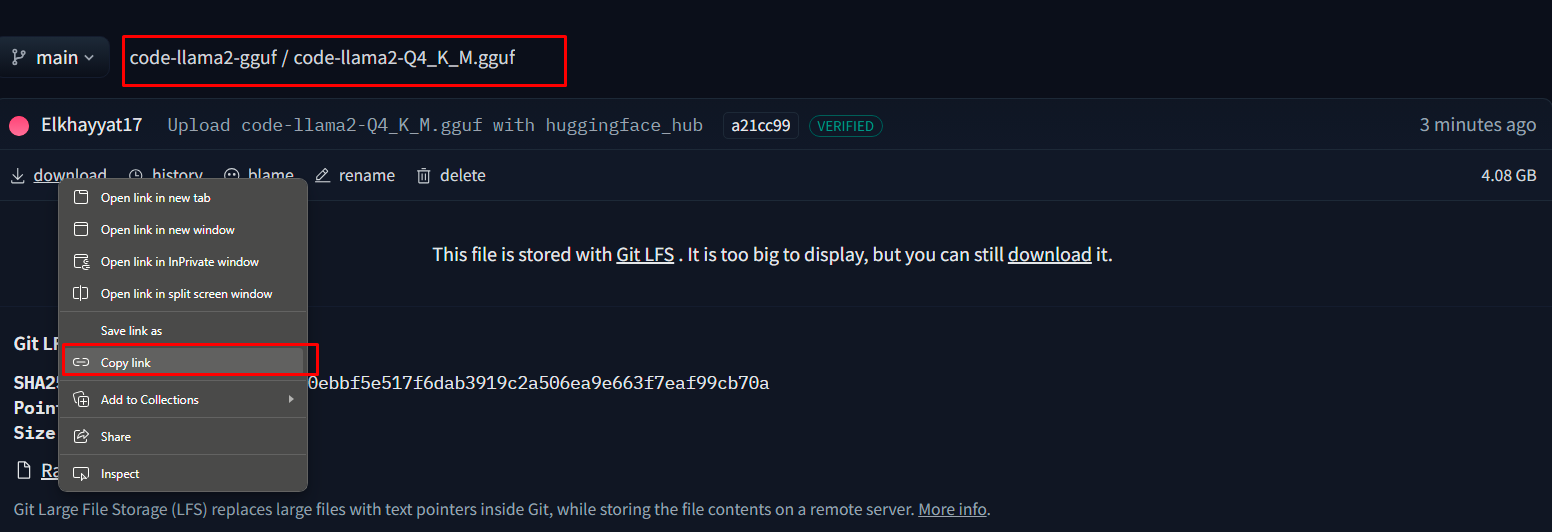

In [ ]:
!wget https://huggingface.co/Elkhayyat17/code-llama2-gguf/resolve/main/code-llama2-Q4_K_M.gguf


--2024-03-05 02:32:47--  https://huggingface.co/Elkhayyat17/code-llama2-gguf/resolve/main/code-llama2-Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 18.172.134.24, 18.172.134.88, 18.172.134.124, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/14/55/145503018677b56abd3b736f599958aaf23213bca4ab6e9a0d1064b95ae970a3/a125f0ca9f660ee65b9c0ebbf5e517f6dab3919c2a506ea9e663f7eaf99cb70a?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27code-llama2-Q4_K_M.gguf%3B+filename%3D%22code-llama2-Q4_K_M.gguf%22%3B&Expires=1709865167&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwOTg2NTE2N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzE0LzU1LzE0NTUwMzAxODY3N2I1NmFiZDNiNzM2ZjU5OTk1OGFhZjIzMjEzYmNhNGFiNmU5YTBkMTA2NGI5NWFlOTcwYTMvYTEyNWYwY2E5ZjY2MGVlNjViOWMwZWJiZjVlNTE3ZjZkYWI

In [ ]:
from llama_cpp import Llama
llm = Llama(
      model_path="code-llama2-Q4_K_M.gguf",
       n_gpu_layers=-1,n_ctx=2048,chat_format="llama-2"
)


llama_model_loader: loaded meta data with 23 key-value pairs and 291 tensors from code-llama2-Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32           

In [ ]:
def agent(quest):
  out=llm.create_chat_completion(
      messages = [{"role": "system", "content": '''Below is an instruction that describes a task, paired with an input
    that provides further context. Write a response that appropriately
    completes the request.'''},
  {"role": "user", "content": f" context:{quest}"}],

    temperature=0.001,
)
  return str(out['choices'][0]['message']['content'])




In [ ]:
print(agent('''Create a nested loop to print every combination of numbers between 0-9?'''))



llama_print_timings:        load time =     362.40 ms
llama_print_timings:      sample time =     252.09 ms /   420 runs   (    0.60 ms per token,  1666.08 tokens per second)
llama_print_timings: prompt eval time =     362.15 ms /    74 tokens (    4.89 ms per token,   204.34 tokens per second)
llama_print_timings:        eval time =    9512.64 ms /   419 runs   (   22.70 ms per token,    44.05 tokens per second)
llama_print_timings:       total time =   11495.66 ms /   493 tokens


  Sure! Here's a nested loop that prints every combination of numbers between 0-9:
```
for i in range(10):
    for j in range(i+1, 10):
        print(i, j)
```
This will output all possible combinations of two numbers between 0 and 9, in the format (i, j). For example:
```
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
```
I hope this helps! Let me know if you have any questions.


In [ ]:
print(agent('''python code to Print out the values in the following dictionary.",
            "my_dict = {\n  'name': 'John Doe',\n  'age': 32,\n  'city': 'New York'\n}"'''))


Llama.generate: prefix-match hit

llama_print_timings:        load time =     362.40 ms
llama_print_timings:      sample time =      30.89 ms /    52 runs   (    0.59 ms per token,  1683.45 tokens per second)
llama_print_timings: prompt eval time =     267.29 ms /    54 tokens (    4.95 ms per token,   202.03 tokens per second)
llama_print_timings:        eval time =    1144.45 ms /    51 runs   (   22.44 ms per token,    44.56 tokens per second)
llama_print_timings:       total time =    1591.64 ms /   105 tokens


  import pprint

pprint(my_dict)
# Output:
{
    'name': 'John Doe',
    'age': 32,
    'city': 'New York'
}


In [ ]:
print(agent("write an array of length 15 containing numbers divisible by 3 up to 45."))


Llama.generate: prefix-match hit

llama_print_timings:        load time =     362.40 ms
llama_print_timings:      sample time =      44.08 ms /    78 runs   (    0.57 ms per token,  1769.71 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    1814.97 ms /    78 runs   (   23.27 ms per token,    42.98 tokens per second)
llama_print_timings:       total time =    2063.90 ms /    79 tokens


  Sure! Here are 15 numbers divisible by 3 up to 45:

3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45
